In [1]:
# import
from llama_index.core.response.notebook_utils import (
    display_source_node,
    display_image_uris,
)
from llama_index.core.schema import ImageNode
from chromadb.utils.data_loaders import ImageLoader
from llama_index.core import SimpleDirectoryReader, StorageContext
from llama_index.core.indices import MultiModalVectorStoreIndex
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.vector_stores.chroma import ChromaVectorStore
from llama_index.core import StorageContext
from llama_index.core import Settings
from IPython.display import Markdown, display
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from llama_index.llms.openai import OpenAI
from dotenv import load_dotenv


In [2]:
Settings.chunk_size = 256
Settings.chunk_overlap = 25

In [3]:
load_dotenv()

True

In [4]:
llm = OpenAI(model="gpt-4o", temperature=0)
Settings.llm = llm

# set defalut text and image embedding functions
# embedding_function = OpenCLIPEmbeddingFunction()


image_loader = ImageLoader()

# create client and a new collection
chroma_client = chromadb.PersistentClient(path="../data/vdb")
chroma_collection = chroma_client.create_collection(
    "softeon_v2",
    data_loader=image_loader,
)

In [5]:
# load documents
documents = SimpleDirectoryReader("../data/processed_data").load_data()

# set up ChromaVectorStore and load in data
vector_store = ChromaVectorStore(chroma_collection=chroma_collection)
storage_context = StorageContext.from_defaults(vector_store=vector_store)
index = MultiModalVectorStoreIndex.from_documents(documents, storage_context)


/Users/akhtar/Documents/Documents-Suhaib/Projects/softeon-poc/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
retriever = index.as_retriever(similarity_top_k=10, image_similarity_top_k=10)

In [23]:
chat_engine = index.as_chat_engine(chat_mode="condense_question", verbose=True)

In [25]:
retrieval_results = retriever.retrieve("How to create a user from existing record?")

image_results = []
MAX_RES = 5
cnt = 0
for r in retrieval_results:
    if isinstance(r.node, ImageNode):
        image_results.append(r.node.metadata["file_path"])
    else:
        if cnt < MAX_RES:
            display_source_node(r)
        cnt += 1

display_image_uris(image_results, [3, 3], top_k=2)

**Node ID:** b4cce2bf-f315-4190-bd73-7a9074434e1e<br>**Similarity:** 0.7552796762300297<br>**Text:** Figure 2 – User Created  
 
You can also create user by copying existing user details.  
3.1. Cre...<br>

**Node ID:** 49530bf1-830e-43cb-a1f8-5cd718be435d<br>**Similarity:** 0.6810950435013073<br>**Text:** On clicking Back, the system displays the created user details in the grid of Security Profile > ...<br>

**Node ID:** d04cb443-3cc8-4cff-aa6e-d24b2e5468b8<br>**Similarity:** 0.6770101731376912<br>**Text:** You can map the 
user to the user group using Advanced User Map tab. Refer Mapping User with User...<br>

**Node ID:** daadb036-f8c7-491b-acd3-6a2d34cc1033<br>**Similarity:** 0.6721710834294568<br>**Text:** 1) Select the user record from the grid to set the security questions and answers. 
2) Select the...<br>

**Node ID:** af116904-2bd5-4b42-84cc-5ece3100fb35<br>**Similarity:** 0.6531386023608045<br>**Text:** On clicking Submit, the system creates the User Group and displays in th grid. 
 
Figure 8 – User...<br>

<Figure size 1600x900 with 0 Axes>

In [26]:
len(image_results)

0

In [32]:
from pprint import pprint
pprint(retrieval_results[0].node.text)

('1) Select the user record from the grid to set the security questions and '
 'answers. \n'
 '2) Select the Delete security questions check box to delete the existing '
 'security questions and set \n'
 'up new questions. \n'
 ' \n'
 'Figure 6 – User selection to set up security questions \n'
 'On clicking Security Questions, the system displays the Security Questions '
 'screen. \n'
 '3) Under Questions, select the questions from the lists. \n'
 'On clicking Submit, the security questions will be set for the selected '
 'user. \n'
 ' \n'
 'Figure 7 – Security Questions screen \n'
 '\x0c'
 ' \n'
 ' \n'
 ' \n'
 ' \n'
 'User Guide \n'
 '10 \n'
 'Security Profile \n'
 '4. Creating User Group \n'
 'User Group is created to group users and grant access rights to a set of '
 'users. \n'
 'Menu Access: Administrator > Security > Security Profile > Group (tab) \n'
 'Mandatory Values \n'
 '1) Specify the User Group ID and its Description. \n'
 '2) Select the User Group Level to indicate the le

In [27]:
result = chat_engine.chat("What are all the items that can be found on the user creation screen?")

Querying with: What are all the items that can be found on the user creation screen in the Softeon WMS Security Profile software?


In [28]:
pprint(result.response)

('The user creation screen in the Softeon WMS Security Profile software '
 'includes options for creating a new user from existing user details, '
 'unlocking user login, and setting up security questions for password change.')


### Image Analysis

In [ ]:
import cv2
import os

In [10]:
dir_path = "../data/processed_data"
wxh = []

# for each file in the directrory if the file is an image load and then print it's size
for file in os.listdir(dir_path):
    if file.endswith(".png"):
        img = cv2.imread(os.path.join(dir_path, file))
        print("Image name: ", file)
        print("Image size: ", img.shape)
        #print w multiplied by h of the image
        wxh.append(img.shape[0] * img.shape[1])
        print("Image size: ", wxh[-1])



Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_5_image_2.png
Image size:  (14, 16, 3)
Image size:  224
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_15_image_1.png
Image size:  (79, 286, 3)
Image size:  22594
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_5_image_3.png
Image size:  (84, 81, 3)
Image size:  6804
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_5_image_1.png
Image size:  (79, 286, 3)
Image size:  22594
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_15_image_2.png
Image size:  (604, 1366, 3)
Image size:  825064
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_19_image_4.png
Image size:  (84, 81, 3)
Image size:  6804
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_15_image_3.png
Image size:  (84, 81, 3)
Image size:  6804
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_10_image_2.png
Image size:  (484, 1366, 3)
Image size:  661144
Image name:  SFTN_WMS_SecurityProfile-UserGuide_page_9_image_2.png
Image size:  (551, 1366, 3)
Image s

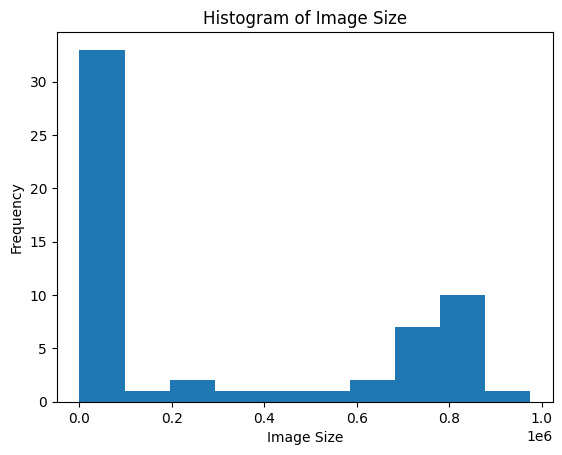

In [13]:
#plot a histogram of the w multiplied by h of the images
import matplotlib.pyplot as plt

plt.hist(wxh, bins=10)
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.title('Histogram of Image Size')
plt.show()

In [14]:
#how many proportion greater than 100,000
greater_than_100000 = [i for i in wxh if i > 100000]
print("Proportion greater than 100,000: ", len(greater_than_100000)/len(wxh))

Proportion greater than 100,000:  0.4406779661016949
